In [33]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as pl
from pmdarima.arima import auto_arima
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15,6

In [18]:
#importação da base de dados
data = pd.read_csv('MRTSMPCSM4400CUSN.csv', index_col = 'date')
data.head()

,realtime_start,value,realtime_end
date,,,
1993-01-01,2019-12-06,-53.3,2019-12-06
1993-02-01,2019-12-06,-2.2,2019-12-06
1993-03-01,2019-12-06,14.8,2019-12-06
1993-04-01,2019-12-06,5.9,2019-12-06
1993-05-01,2019-12-06,3.9,2019-12-06


In [28]:
#drop de colunas que não serão utilizadas
data = data.drop(columns = ['realtime_start','realtime_end'])

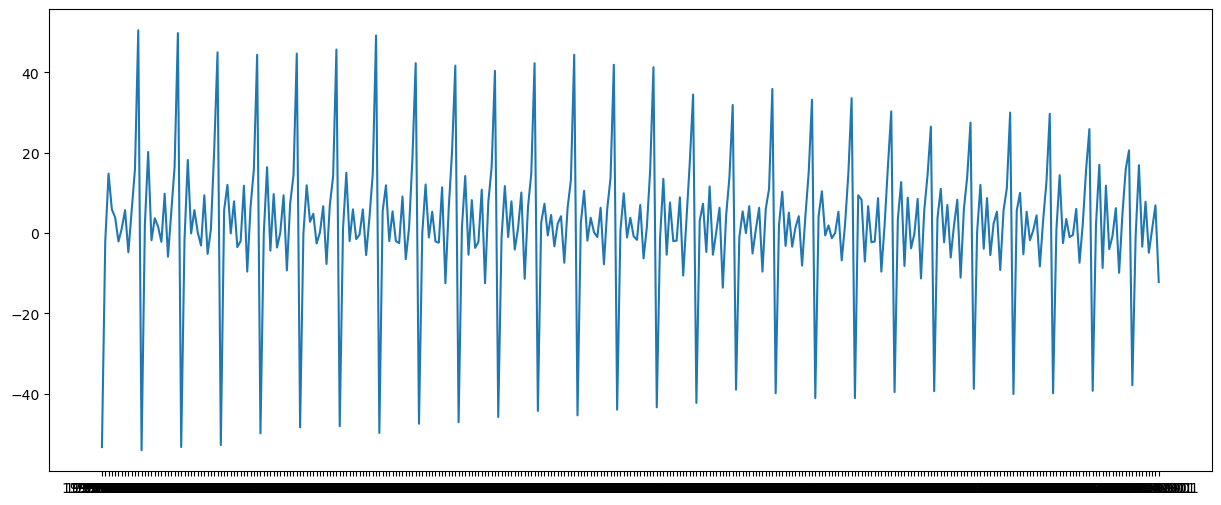

In [32]:
#visualização dos dados
pl.plot(data)

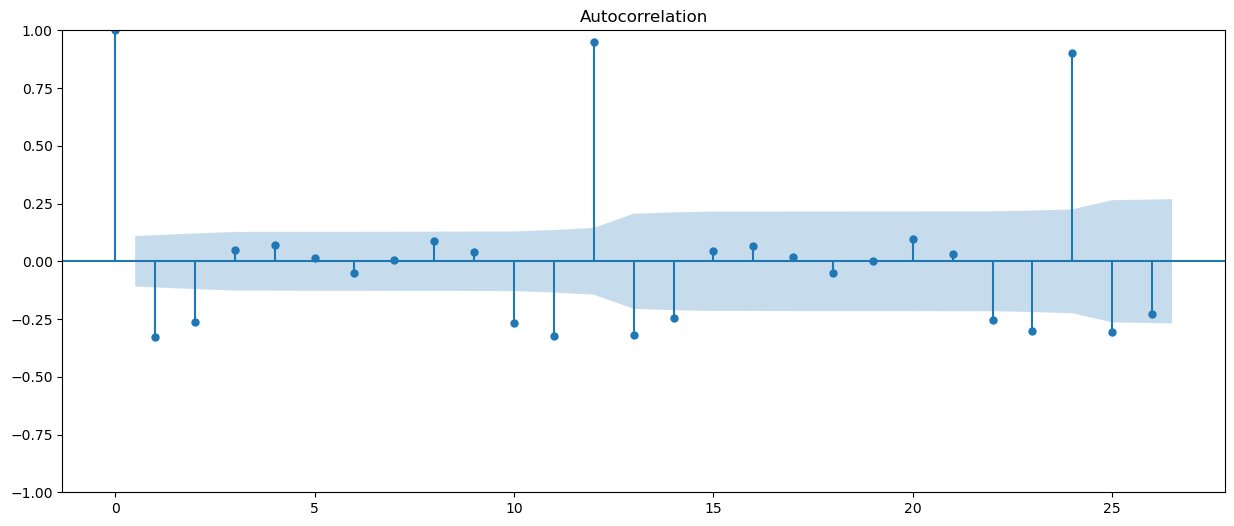

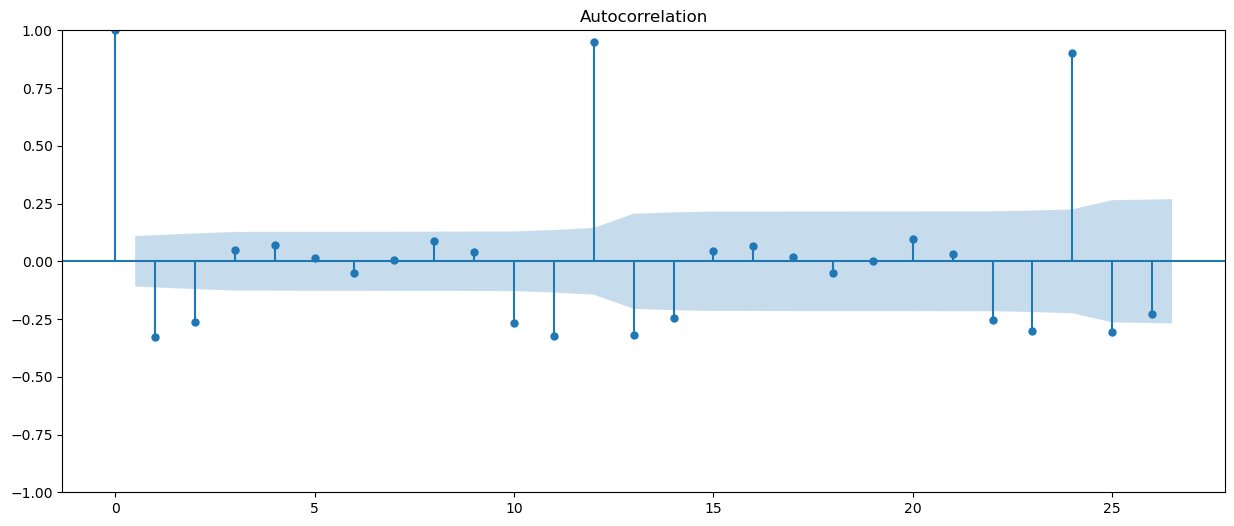

In [35]:
#verificação do periodo de sazonalidade
#com picos em 12 e 24 podemos inferir que o numero de periodos da sazonalidade é igual a 12(anual já que os dados foram coletados mensalmente)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data)

In [36]:
#decomposição para visualização de tendencias,sazonalidade e ruído
decomp = seasonal_decompose(data, period = 12)

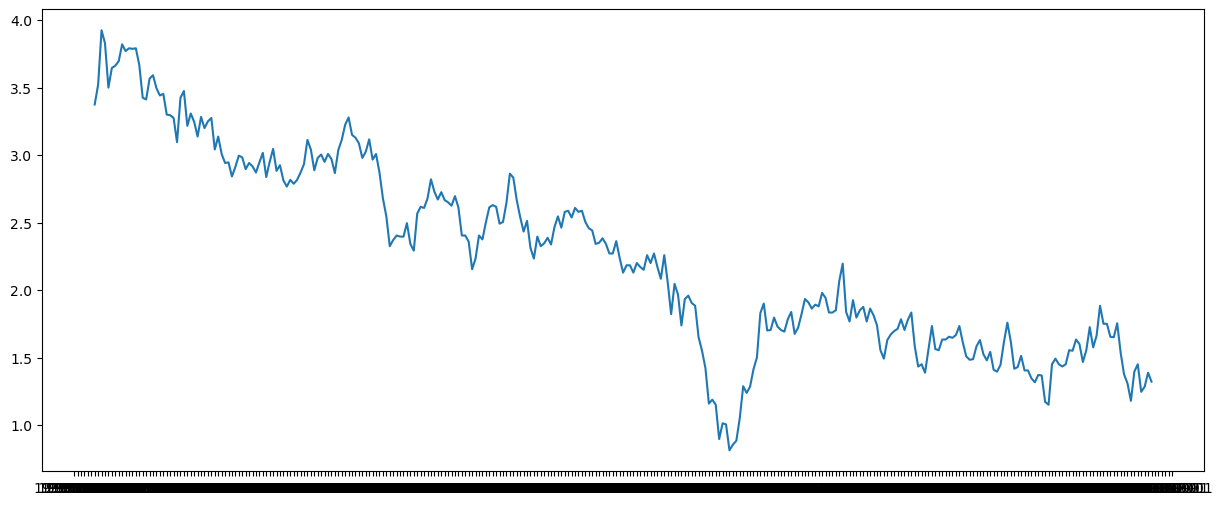

In [37]:
#tendencia
tendencia = decomp.trend
pl.plot(tendencia)

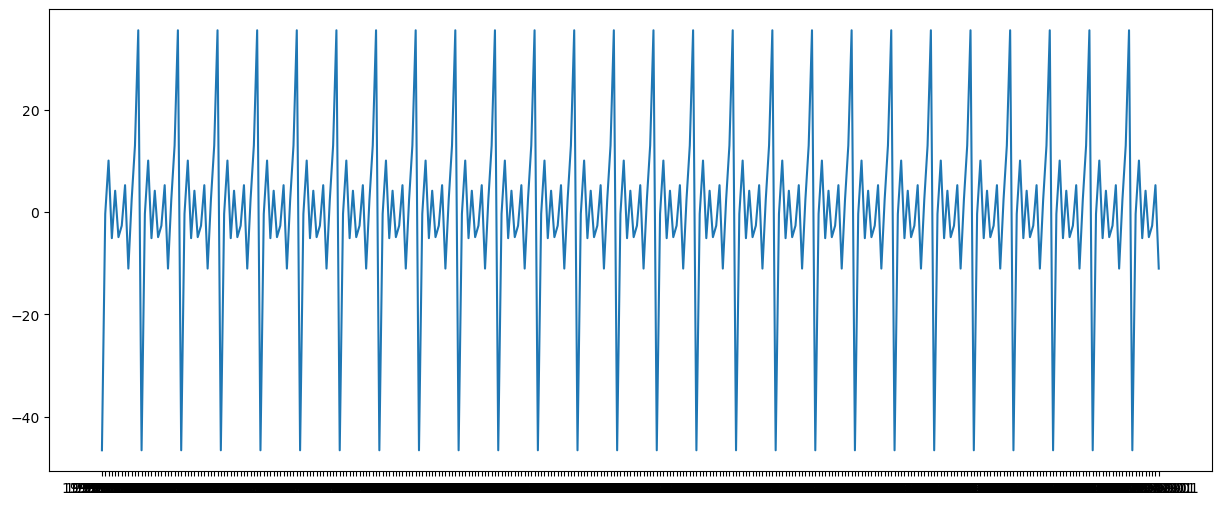

In [38]:
#sazonalidade
sazonalidade = decomp.seasonal
pl.plot(sazonalidade)

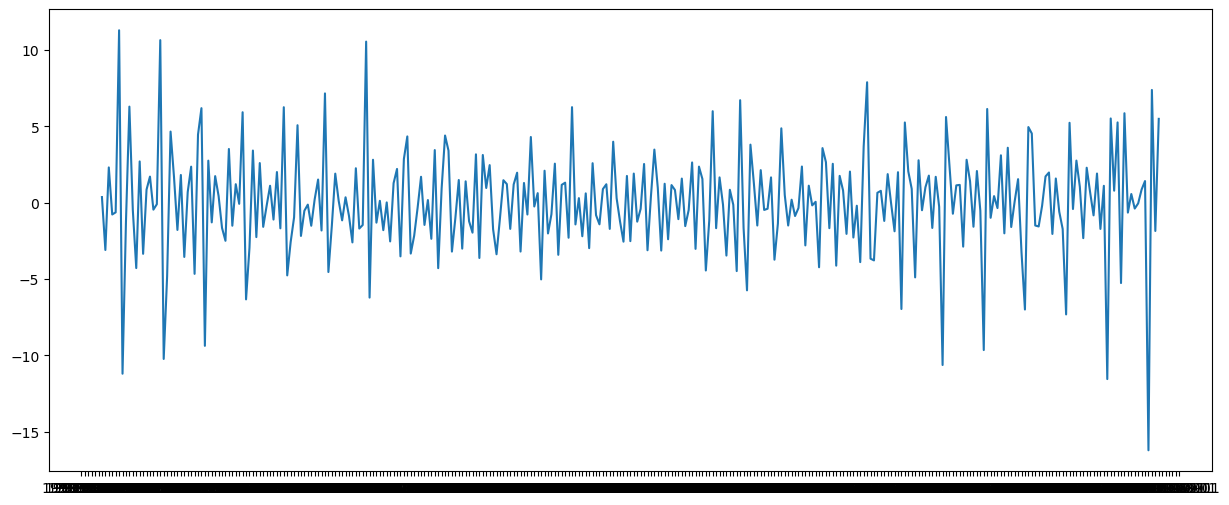

In [39]:
#erro
ruido = decomp.resid
pl.plot(ruido)

In [40]:
#definição dos melhores p,d e q(P,D,Q) para o modelo, utilizando da função auto_arima
stepwise_model = auto_arima(data, m = 12, seasonal = True, trace = True )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1351.568, Time=1.83 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1520.969, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1411.963, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1371.264, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1519.249, Time=0.08 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1350.323, Time=0.64 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1393.178, Time=0.30 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1351.582, Time=2.51 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1360.378, Time=1.17 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1353.557, Time=4.98 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1365.794, Time=0.96 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1348.570, Time=0.74 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=1391.218, Time=0.45 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=1349.624, Time=0.98 sec
 ARIMA(2,0,1)(0,1,2

In [47]:
#separação dos dados em treino e teste
train = data.loc[:'2018-12-01']

In [49]:
test = data.loc['2019-01-01':]

In [51]:
#treino do modelo
stepwise_model.fit(train)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [53]:
#previsão dos valores test
future_forecast = stepwise_model.predict(n_periods = 9)

In [54]:
future_forecast

2019-01-01   -35.523199
2019-02-01     1.599757
2019-03-01    13.181135
2019-04-01    -4.665010
2019-05-01     7.644674
2019-06-01    -3.410256
2019-07-01     0.140029
2019-08-01     5.385056
2019-09-01    -9.111294
Freq: MS, dtype: float64

In [56]:
#para melhor visualização e comparação tranformo future forecast em um data frame
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['value'])

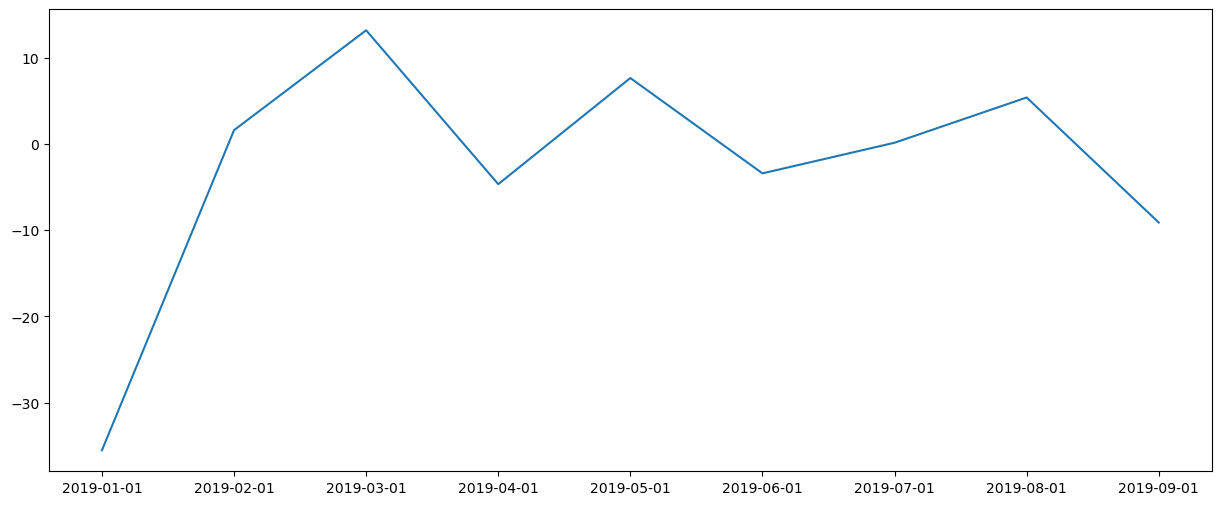

In [58]:
pl.plot(future_forecast)

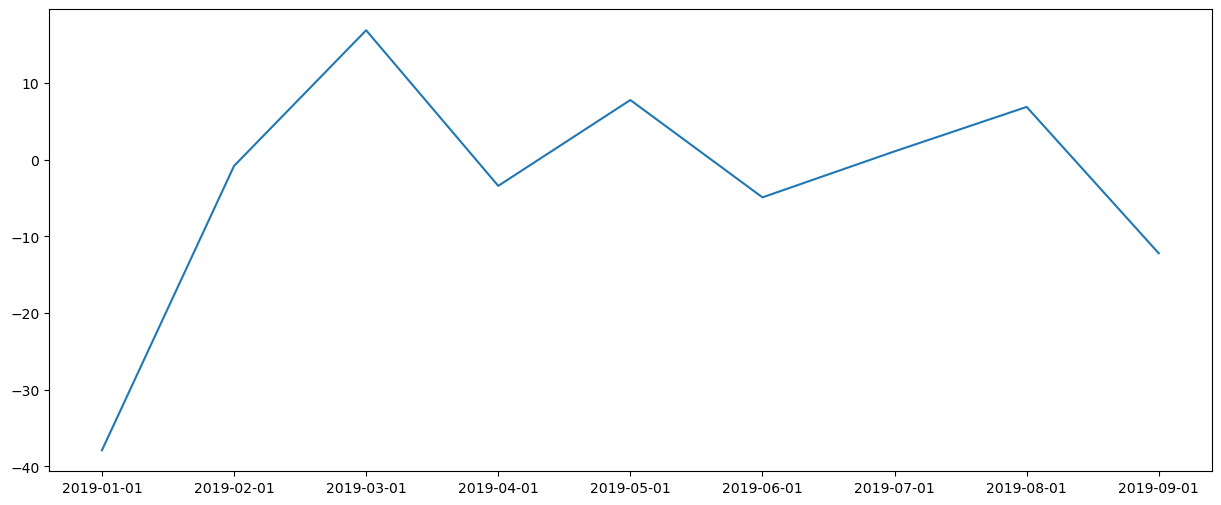

In [59]:
pl.plot(test)

<Axes: xlabel='date'>

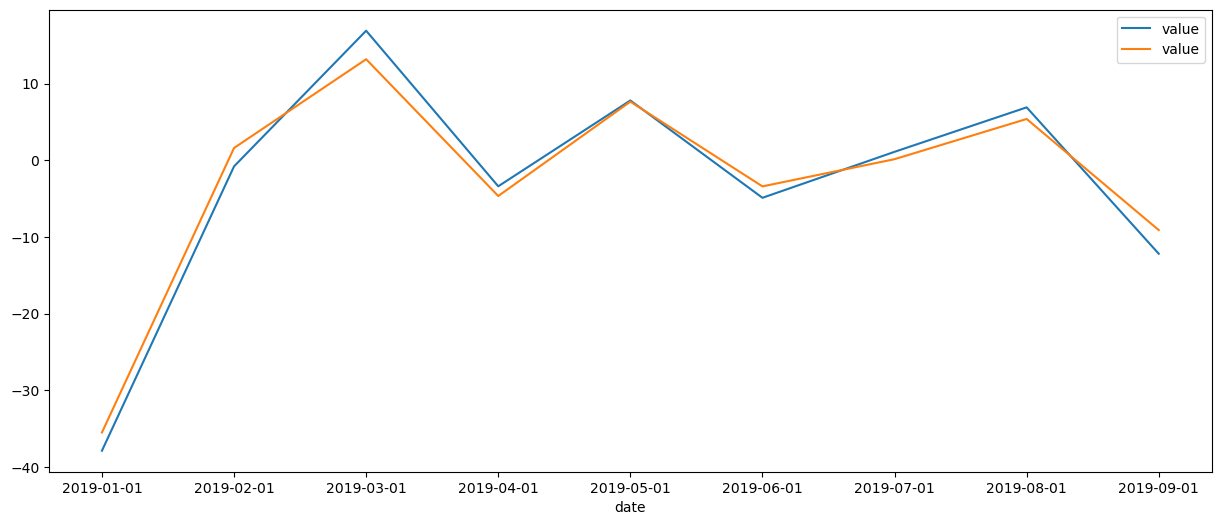

In [60]:
#visualização em conjunto das previsões com o teste
pd.concat([test,future_forecast], axis = 1).plot()

<Axes: xlabel='date'>

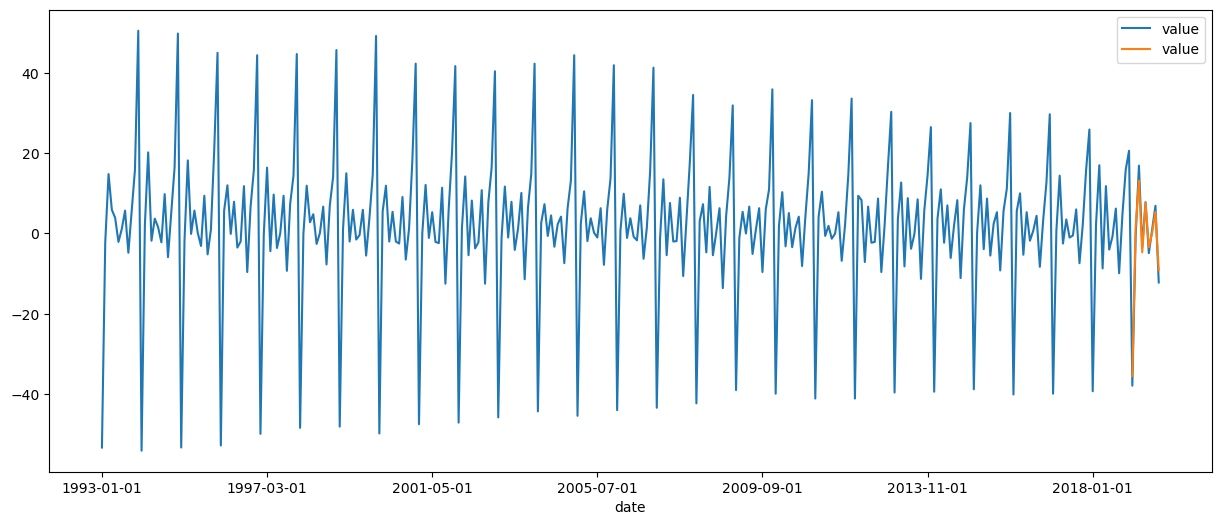

In [61]:
#vizualização do teste com o todo
pd.concat([data,future_forecast], axis = 1).plot()

In [62]:
#salvando
from joblib import dump

dump(stepwise_model,'stepwise_model')

['stepwise_model']